<a href="https://colab.research.google.com/github/gowoon106/ITB2022/blob/main/%EA%B0%80%EC%A1%B1%EC%9E%90%EC%9B%90%EA%B2%BD%EC%98%81%ED%95%99%EA%B3%BC_2014438_%EA%B9%80%EA%B3%A0%EC%9A%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

한글 깨짐 해결

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

패키지 실행

In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sns   

구글 드라이브 연결

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


데이터 가져오기

In [5]:
health = pd.read_csv("/content/drive/My Drive/BigMining/health_data.csv")
display(health.head()) 
print(health.info()) 

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020.0,1.0,36.0,M,9.0,165.0,60.0,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0.0,NaN,NaN,12/29/2021
1,2020.0,2.0,27.0,F,13.0,150.0,65.0,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0.0,NaN,NaN,12/29/2021
2,2020.0,3.0,11.0,F,12.0,155.0,55.0,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0.0,NaN,NaN,12/29/2021
3,2020.0,4.0,31.0,M,13.0,160.0,70.0,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1.0,0.0,0.0,12/29/2021
4,2020.0,5.0,41.0,F,12.0,155.0,50.0,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0.0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  float64
 1   가입자일련번호      10000 non-null  float64
 2   시도코드         10000 non-null  float64
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  float64
 5   신장(5Cm단위)    10000 non-null  float64
 6   체중(5Kg 단위)   10000 non-null  float64
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  float64
 11  청력(우)        10000 non-null  float64
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소 

# **1. 체중(5Kg 단위)과 허리둘레 간 산점도**



[(40.0, 150.0), (20.0, 150.0)]

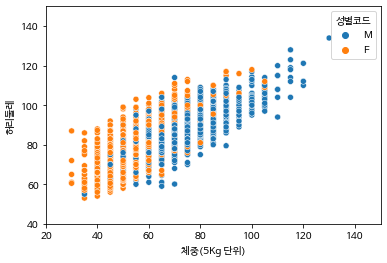

In [6]:
sns.scatterplot(data = health, x = '체중(5Kg 단위)', y = '허리둘레', hue = '성별코드').set(xlim = (20, 150), ylim = (40, 150))
#가시성 있는 시각화를 위해 칼럼의 특성에 따라 스케일을 조정해 주었다.

▶ 기본적으로 체중이 증가함에 따라 허리둘레 수치도 증가하는 우상향 그래프 형태를 보여주고 있다.

▶ 성별코드에 따른 색 구분을 확인했을 때, 체중 80kg 이상부터 여성 케이스를 잘 발견할 수 없고 대다수가 남성 케이스인 것을 볼 수 있다.

# **2. 음주여부와 간기능 간 관계**

*   **음주여부에 따른 감마지티피 평균을 나타내는 막대그래프**



In [7]:
df_alchol = health.groupby('음주여부' , as_index = False).agg(mean_GTP = ('감마지티피', 'mean'))
df_alchol

,음주여부,mean_GTP
0,No,27.305576
1,Yes,45.740351


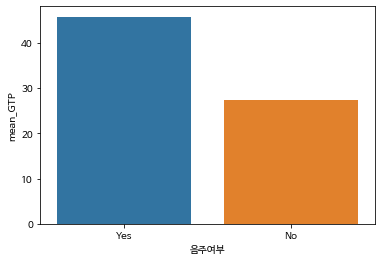

In [8]:
df_alchol = df_alchol.sort_values('mean_GTP', ascending = False)
sns.barplot(data = df_alchol, x = '음주여부', y = 'mean_GTP')



*   **음주여부에 따른 (혈청지오티)ALT 평균을 나타내는 막대그래프**



In [9]:
df_alchol2 = health.groupby('음주여부' , as_index = False).agg(mean_ALT = ('(혈청지오티)ALT', 'mean'))
df_alchol2

,음주여부,mean_ALT
0,No,24.851960
1,Yes,28.163853


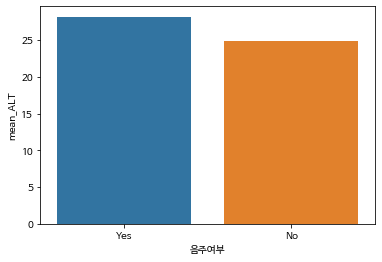

In [10]:
df_alchol2 = df_alchol2.sort_values('mean_ALT', ascending = False)
sns.barplot(data = df_alchol2, x = '음주여부', y = 'mean_ALT')



*   **음주여부에 따른 (혈청지오티)AST 평균을 나타내는 막대그래프**



In [11]:
df_alchol3 = health.groupby('음주여부' , as_index = False).agg(mean_AST = ('(혈청지오티)AST', 'mean'))
df_alchol3

,음주여부,mean_AST
0,No,26.731678
1,Yes,28.199173


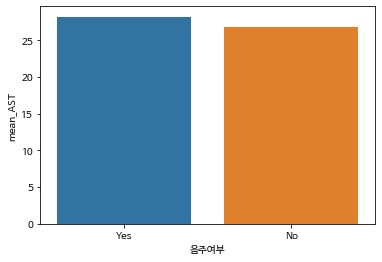

In [12]:
df_alchol3 = df_alchol3.sort_values('mean_AST', ascending = False)
sns.barplot(data = df_alchol3, x = '음주여부', y = 'mean_AST')

▶ 음주여부가 No일 때보다 Yes일 때 감마지티피, 혈청지오티(ALT), 혈청지오티(AST)의 평균값이 크게 나타나는 것을 볼 수 있다.

▶ 이는 음주가 간기능 저하에 영향을 끼침을 시사한다.

# **3. 흡연상태와 혈색소 간 관계**

*   **흡연상태에 따른 혈색소 평균을 나타내는 막대그래프**




In [13]:
df_cigarett = health.groupby('흡연상태', as_index = False).agg(mean_Hb = ('혈색소', 'mean'))
df_cigarett

,흡연상태,mean_Hb
0,No,13.676786
1,NotNow,14.935610
2,Yes,15.266867


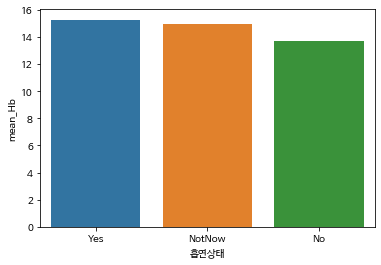

In [14]:
df_cigarett = df_cigarett.sort_values('mean_Hb', ascending = False)
sns.barplot(data = df_cigarett, x = '흡연상태', y = 'mean_Hb')



*   **흡연상태에 따른 혈색소 값을 나타내는 상자그림**



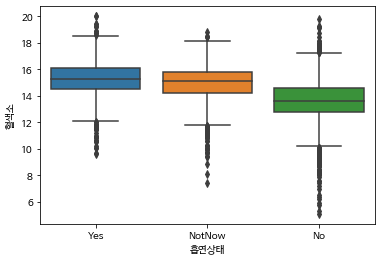

In [15]:
sns.boxplot(data = health, x = '흡연상태', order = ['Yes', 'NotNow', 'No'], y = '혈색소')


▶ 흡연상태와 혈색소 평균 간 막대그래프 확인 결과, 현재 흡연자이거나 이전에 흡연자였던 사람의 혈색소 수치 평균이 흡연 경험이 없는 사람보다 높게 나타난다. 이는 폐에 직접적으로 부정적 영향을 끼칠 수 있는 흡연 여부가 혈색소 증가와 관련이 있음을 의미한다.

▶ 흡연상태와 혈색소 값 간 상자 그림 확인 결과, 흡연을 하지 않는 사람을 나타낸 상자그림의 중간값, 최대값, 최소값이 타 흡연상태에 비해 낮은 것으로 확인된다. 아울러 다른 상자그림도 함께 확인 시 막대그래프와 같이 Yes > NotNow > No의 결과를 보여 준다. 다만 흡연상태가 No인 집단에서 낮은 혈색소 수치(이상치)가 타 집단에 비해 많아 보이는데, 이는 일반적으로 흡연을 하지 않는 어린이 등의 값이 포함되기에 두드러지는 것으로 시사된다. 

# **4. 요단백과 식전혈당(공복혈당)을 나타내는 상자그림**

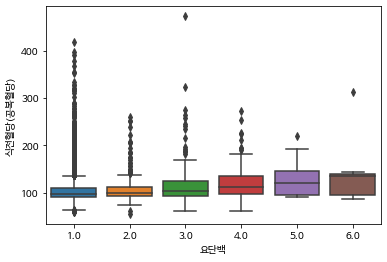

In [16]:
sns.boxplot(data = health, x = '요단백', y = '식전혈당(공복혈당)')

▶ 요단백 수치가 증가할수록, 즉 소변에서 검출되는 단백질이 많아질수록 상자그림의 상자가 중간값, 최대값 등이 대체로 증가하는 양상을 띠고 있다. 이는 요단백 수치의 증가가 식전혈당의 증가에 영향을 끼침을 보여준다. 요단백 수치와 식전혈당 수치는 모두 당뇨와 관련이 있으므로, 해당 수치가 높게 나온다면 당뇨에 유의해야 할 필요가 있다.

▶ 요단백이 1.0인 집단에서 높은 식전혈당 이상치가 매우 많이 나타난 것을 볼 수 있다. 높은 식전혈당 수치에 영향을 끼칠 수 있는 다른 요인에 대해 탐색해보고자 하였으나, 해당 데이터프레임 내 타 변수와의 유의미한 관계를 발견하지 못했다. 따라서 추후 추가 데이터나 더 깊이 있는 도메인 지식을 갖추어 재탐색할 필요가 있는 문제이다.